Scenario II - Waiting Time Distribution
<br>
Case I: 50% of customers request service A, whereas 50% of customers do
service B

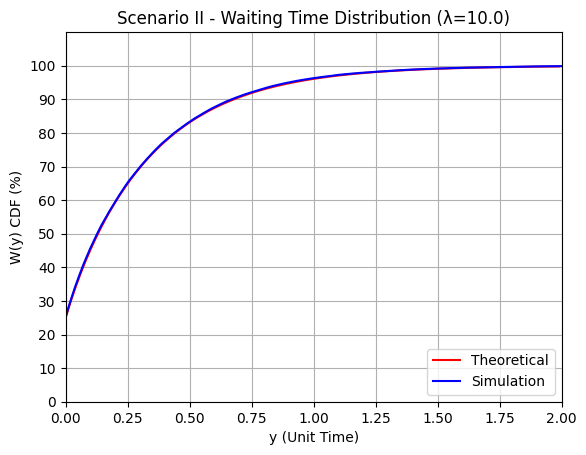

Mean Squared Error: 0.10065599781785371


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# The waiting time distribution formula
def CalculateWaitingTimeProbabilityCDF(Lambda, Rho, eachWaitingTime):
  eachWaitingTimeProbabilityCDF = (1 - Rho) * (4 - ((1.5 + math.sqrt(2)) * math.exp((-1) * (Lambda - (math.sqrt(2) / 2) * Lambda) * eachWaitingTime)) - ((1.5 - math.sqrt(2)) * math.exp((-1) * (Lambda + (math.sqrt(2) / 2) * Lambda) * eachWaitingTime)))
  eachWaitingTimeProbabilityCDF = eachWaitingTimeProbabilityCDF * 100
  return eachWaitingTimeProbabilityCDF

Lambda = 10.0
requestServiceAProbability = 0.5
averageServiceTimeA = (1 / Lambda)
requestServiceBProbability = 0.5
averageServiceTimeB = (1 / (2 * Lambda))
averageServiceTime = requestServiceAProbability * averageServiceTimeA + requestServiceBProbability * averageServiceTimeB
Rho = Lambda * averageServiceTime

# Draw the CDF figure using theoretical values
waitingTime = np.arange(0, 2, 0.01)
waitingTimeProbabilityCDF = []
for eachWaitingTime in waitingTime:
  eachWaitingTimeProbabilityCDF = CalculateWaitingTimeProbabilityCDF(Lambda, Rho, eachWaitingTime)
  waitingTimeProbabilityCDF.append(eachWaitingTimeProbabilityCDF)
plt.plot(waitingTime, waitingTimeProbabilityCDF, color = 'red')

# Randomly obtain the interarrival time and service time for each customer
customer = 100000
interArrivalTime = []
serviceTime = []
for i in range(customer):
  eachInterArrivalTime = np.random.exponential(1 / Lambda)
  interArrivalTime.append(eachInterArrivalTime)
  serviceNumber = random.randint(1, 2)
  if serviceNumber == 1:
    eachServiceTime = np.random.exponential(averageServiceTimeA)
  else:
    eachServiceTime = np.random.exponential(averageServiceTimeB)
  serviceTime.append(eachServiceTime)

# Calculate the waiting time for each customer through interarrival time and service time
waitingTime = []
STotalTime = 0
QTotalTime = 0
waitingTime.append(0)
for i in range(1, customer):
  STotalTime += serviceTime[i - 1]
  QTotalTime += interArrivalTime[i]
  if STotalTime - QTotalTime <= 0:
    waitingTime.append(0)
    STotalTime = QTotalTime
  else:
    waitingTime.append(STotalTime - QTotalTime)
waitingTime.sort()

# Draw the CDF figure through network simulation
temp = []
waitingTimeProbabilityCDF = []
for i in range(customer):
  if waitingTime[i] > 0:
    temp.append(waitingTime[i])
    waitingTimeProbabilityCDF.append(((i + 1) / customer) * 100)
waitingTime = temp
plt.plot(waitingTime, waitingTimeProbabilityCDF, color = 'blue')

# Setting up the CDF figure
plt.title("Scenario II - Waiting Time Distribution (λ=" + str(Lambda) + ")")
plt.xlabel("y (Unit Time)")
plt.ylabel("W(y) CDF (%)")
plt.xlim(0, 2)
plt.ylim(0, 110)
plt.xticks(np.arange(0.0, 2.25, 0.25))
plt.yticks(np.arange(0, 110, 10))
plt.legend(['Theoretical', 'Simulation'], loc = "lower right")
plt.grid()
plt.show()

# Calculate MSE
MSE = 0
for i in range(len(waitingTime)):
  MSE = MSE + (waitingTimeProbabilityCDF[i] - CalculateWaitingTimeProbabilityCDF(Lambda, Rho, waitingTime[i])) ** 2
MSE = MSE / len(waitingTime)
print("Mean Squared Error:", MSE)

Scenario II - System Time Distribution
<br>
Case I: 50% of customers request service A, whereas 50% of customers do
service B

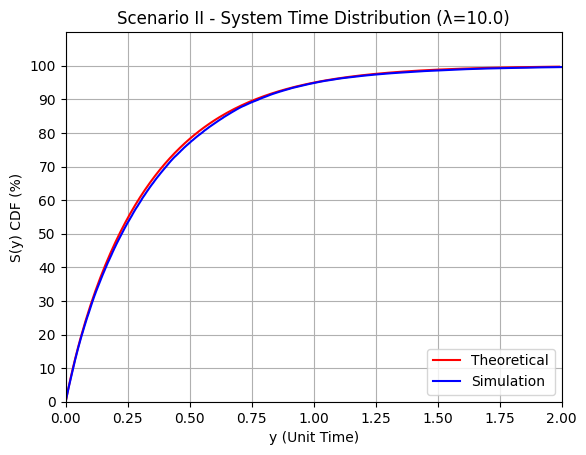

Mean Squared Error: 0.8128373020951769


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# The system time distribution formula
def CalculateSystemTimeProbabilityCDF(Lambda, Rho, eachSystemTime):
  eachSystemTimeProbabilityCDF = (1 - Rho) * (4 - ((2 + 1.25 * math.sqrt(2)) * math.exp((-1) * (Lambda - (math.sqrt(2) / 2) * Lambda) * eachSystemTime)) - ((2 - 1.25 * math.sqrt(2)) * math.exp((-1) * (Lambda + (math.sqrt(2) / 2) * Lambda) * eachSystemTime)))
  eachSystemTimeProbabilityCDF = eachSystemTimeProbabilityCDF * 100
  return eachSystemTimeProbabilityCDF

Lambda = 10.0
requestServiceAProbability = 0.5
averageServiceTimeA = (1 / Lambda)
requestServiceBProbability = 0.5
averageServiceTimeB = (1 / (2 * Lambda))
averageServiceTime = requestServiceAProbability * averageServiceTimeA + requestServiceBProbability * averageServiceTimeB
Rho = Lambda * averageServiceTime

# Draw the CDF figure using theoretical values
systemTime = np.arange(0, 2, 0.01)
systemTimeProbabilityCDF = []
for eachSystemTime in systemTime:
  eachSystemTimeProbabilityCDF = CalculateSystemTimeProbabilityCDF(Lambda, Rho, eachSystemTime)
  systemTimeProbabilityCDF.append(eachSystemTimeProbabilityCDF)
plt.plot(systemTime, systemTimeProbabilityCDF, color = 'red')

# Randomly obtain the interarrival time and service time for each customer
customer = 100000
interArrivalTime = []
serviceTime = []
for i in range(customer):
  eachInterArrivalTime = np.random.exponential(1 / Lambda)
  interArrivalTime.append(eachInterArrivalTime)
  serviceNumber = random.randint(1, 2)
  if serviceNumber == 1:
    eachServiceTime = np.random.exponential(averageServiceTimeA)
  else:
    eachServiceTime = np.random.exponential(averageServiceTimeB)
  serviceTime.append(eachServiceTime)

# Calculate the waiting time for each customer through interarrival time and service time
waitingTime = []
STotalTime = 0
QTotalTime = 0
waitingTime.append(0)
for i in range(1, customer):
  STotalTime += serviceTime[i - 1]
  QTotalTime += interArrivalTime[i]
  if STotalTime - QTotalTime <= 0:
    waitingTime.append(0)
    STotalTime = QTotalTime
  else:
    waitingTime.append(STotalTime - QTotalTime)

# Draw the CDF figure through network simulation
systemTime = []
for i in range(customer):
  systemTime.append(waitingTime[i] + serviceTime[i])
systemTime.sort()
systemTimeProbabilityCDF = []
for i in range(customer):
  systemTimeProbabilityCDF.append(((i + 1) / customer) * 100)
plt.plot(systemTime, systemTimeProbabilityCDF, color = 'blue')

# Setting up the CDF figure
plt.title("Scenario II - System Time Distribution (λ=" + str(Lambda) + ")")
plt.xlabel("y (Unit Time)")
plt.ylabel("S(y) CDF (%)")
plt.xlim(0, 2)
plt.ylim(0, 110)
plt.xticks(np.arange(0.0, 2.25, 0.25))
plt.yticks(np.arange(0, 110, 10))
plt.legend(['Theoretical', 'Simulation'], loc = "lower right")
plt.grid()
plt.show()

# Calculate MSE
MSE = 0
for i in range(len(systemTime)):
  MSE = MSE + (systemTimeProbabilityCDF[i] - CalculateSystemTimeProbabilityCDF(Lambda, Rho, systemTime[i])) ** 2
MSE = MSE / len(systemTime)
print("Mean Squared Error:", MSE)

Scenario II - Waiting Time Distribution
<br>
Case II: 25% of customers request service A, whereas 75% of customers do
service B

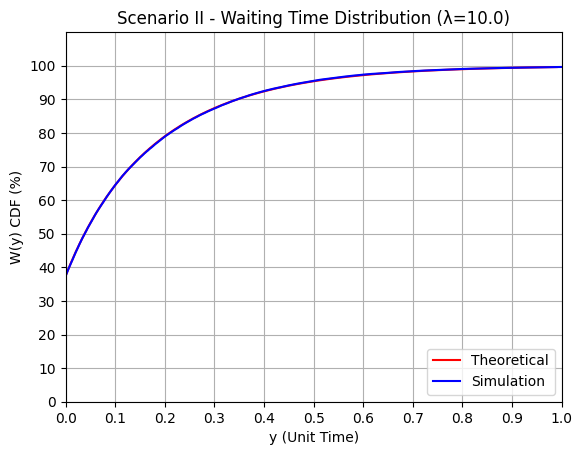

Mean Squared Error: 0.008314273538128419


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# The waiting time distribution formula
def CalculateWaitingTimeProbabilityCDF(Lambda, Rho, eachWaitingTime):
  eachWaitingTimeProbabilityCDF = (1 - Rho) * ((8 / 3) - (1.5 * math.exp((-0.5) * Lambda * eachWaitingTime)) - ((1 / 6) * math.exp((-1.5) * Lambda * eachWaitingTime)))
  eachWaitingTimeProbabilityCDF = eachWaitingTimeProbabilityCDF * 100
  return eachWaitingTimeProbabilityCDF

Lambda = 10.0
requestServiceAProbability = 0.25
averageServiceTimeA = (1 / Lambda)
requestServiceBProbability = 0.75
averageServiceTimeB = (1 / (2 * Lambda))
averageServiceTime = requestServiceAProbability * averageServiceTimeA + requestServiceBProbability * averageServiceTimeB
Rho = Lambda * averageServiceTime

# Draw the CDF figure using theoretical values
waitingTime = np.arange(0, 1, 0.01)
waitingTimeProbabilityCDF = []
for eachWaitingTime in waitingTime:
  eachWaitingTimeProbabilityCDF = CalculateWaitingTimeProbabilityCDF(Lambda, Rho, eachWaitingTime)
  waitingTimeProbabilityCDF.append(eachWaitingTimeProbabilityCDF)
plt.plot(waitingTime, waitingTimeProbabilityCDF, color = 'red')

# Randomly obtain the interarrival time and service time for each customer
customer = 100000
interArrivalTime = []
serviceTime = []
for i in range(customer):
  eachInterArrivalTime = np.random.exponential(1 / Lambda)
  interArrivalTime.append(eachInterArrivalTime)
  serviceNumber = random.randint(1, 4)
  if serviceNumber == 1:
    eachServiceTime = np.random.exponential(averageServiceTimeA)
  else:
    eachServiceTime = np.random.exponential(averageServiceTimeB)
  serviceTime.append(eachServiceTime)

# Calculate the waiting time for each customer through interarrival time and service time
waitingTime = []
STotalTime = 0
QTotalTime = 0
waitingTime.append(0)
for i in range(1, customer):
  STotalTime += serviceTime[i - 1]
  QTotalTime += interArrivalTime[i]
  if STotalTime - QTotalTime <= 0:
    waitingTime.append(0)
    STotalTime = QTotalTime
  else:
    waitingTime.append(STotalTime - QTotalTime)
waitingTime.sort()

# Draw the CDF figure through network simulation
temp = []
waitingTimeProbabilityCDF = []
for i in range(customer):
  if waitingTime[i] > 0:
    temp.append(waitingTime[i])
    waitingTimeProbabilityCDF.append(((i + 1) / customer) * 100)
waitingTime = temp
plt.plot(waitingTime, waitingTimeProbabilityCDF, color = 'blue')

# Setting up the CDF figure
plt.title("Scenario II - Waiting Time Distribution (λ=" + str(Lambda) + ")")
plt.xlabel("y (Unit Time)")
plt.ylabel("W(y) CDF (%)")
plt.xlim(0, 1)
plt.ylim(0, 110)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.legend(['Theoretical', 'Simulation'], loc = "lower right")
plt.grid()
plt.show()

# Calculate MSE
MSE = 0
for i in range(len(waitingTime)):
  MSE = MSE + (waitingTimeProbabilityCDF[i] - CalculateWaitingTimeProbabilityCDF(Lambda, Rho, waitingTime[i])) ** 2
MSE = MSE / len(waitingTime)
print("Mean Squared Error:", MSE)

Scenario II - System Time Distribution
<br>
Case II: 25% of customers request service A, whereas 75% of customers do
service B

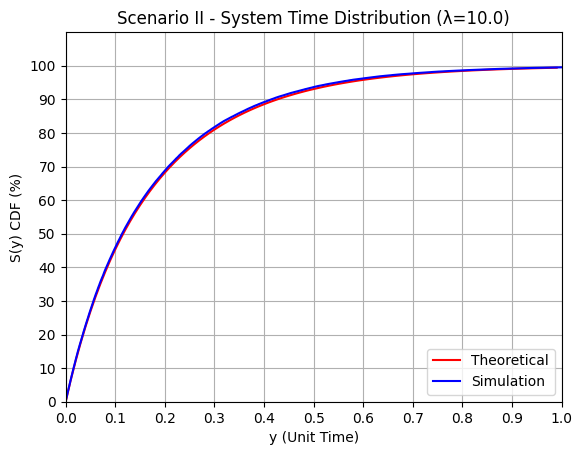

Mean Squared Error: 0.2776709441540342


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math

# The system time distribution formula
def CalculateSystemTimeProbabilityCDF(Lambda, Rho, eachSystemTime):
  eachSystemTimeProbabilityCDF = (1 - Rho) * ((8 / 3) - (2.25 * math.exp((-0.5) * Lambda * eachSystemTime)) - ((5 / 12) * math.exp((-1.5) * Lambda * eachSystemTime)))
  eachSystemTimeProbabilityCDF = eachSystemTimeProbabilityCDF * 100
  return eachSystemTimeProbabilityCDF

Lambda = 10.0
requestServiceAProbability = 0.25
averageServiceTimeA = (1 / Lambda)
requestServiceBProbability = 0.75
averageServiceTimeB = (1 / (2 * Lambda))
averageServiceTime = requestServiceAProbability * averageServiceTimeA + requestServiceBProbability * averageServiceTimeB
Rho = Lambda * averageServiceTime

# Draw the CDF figure using theoretical values
systemTime = np.arange(0, 1, 0.01)
systemTimeProbabilityCDF = []
for eachSystemTime in systemTime:
  eachSystemTimeProbabilityCDF = CalculateSystemTimeProbabilityCDF(Lambda, Rho, eachSystemTime)
  systemTimeProbabilityCDF.append(eachSystemTimeProbabilityCDF)
plt.plot(systemTime, systemTimeProbabilityCDF, color = 'red')

# Randomly obtain the interarrival time and service time for each customer
customer = 100000
interArrivalTime = []
serviceTime = []
for i in range(customer):
  eachInterArrivalTime = np.random.exponential(1 / Lambda)
  interArrivalTime.append(eachInterArrivalTime)
  serviceNumber = random.randint(1, 4)
  if serviceNumber == 1:
    eachServiceTime = np.random.exponential(averageServiceTimeA)
  else:
    eachServiceTime = np.random.exponential(averageServiceTimeB)
  serviceTime.append(eachServiceTime)

# Calculate the waiting time for each customer through interarrival time and service time
waitingTime = []
STotalTime = 0
QTotalTime = 0
waitingTime.append(0)
for i in range(1, customer):
  STotalTime += serviceTime[i - 1]
  QTotalTime += interArrivalTime[i]
  if STotalTime - QTotalTime <= 0:
    waitingTime.append(0)
    STotalTime = QTotalTime
  else:
    waitingTime.append(STotalTime - QTotalTime)

# Draw the CDF figure through network simulation
systemTime = []
for i in range(customer):
  systemTime.append(waitingTime[i] + serviceTime[i])
systemTime.sort()
systemTimeProbabilityCDF = []
for i in range(customer):
  systemTimeProbabilityCDF.append(((i + 1) / customer) * 100)
plt.plot(systemTime, systemTimeProbabilityCDF, color = 'blue')

# Setting up the CDF figure
plt.title("Scenario II - System Time Distribution (λ=" + str(Lambda) + ")")
plt.xlabel("y (Unit Time)")
plt.ylabel("S(y) CDF (%)")
plt.xlim(0, 1)
plt.ylim(0, 110)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.legend(['Theoretical', 'Simulation'], loc = "lower right")
plt.grid()
plt.show()

# Calculate MSE
MSE = 0
for i in range(len(systemTime)):
  MSE = MSE + (systemTimeProbabilityCDF[i] - CalculateSystemTimeProbabilityCDF(Lambda, Rho, systemTime[i])) ** 2
MSE = MSE / len(systemTime)
print("Mean Squared Error:", MSE)